https://zhuanlan.zhihu.com/p/369099011

蒙特卡罗方法也成统计模拟方法，是指使用随机数（或者更常见的伪随机数）来解决很多计算问题的方法。他的工作原理就是两件事：不断抽样、逐渐逼近。

In [1]:
# 举例，求pi
import random
total = [10, 100, 1000, 10000, 100000, 1000000, 5000000]  #随机点数
for t in total:
    in_count = 0
    for i in range(t):
        x = random.random()
        y = random.random()
        dis = (x**2 + y**2)**0.5
        if dis<=1:
            in_count += 1
    print(t,'个随机点时，π是：', 4*in_count/t)

10 个随机点时，π是： 2.8
100 个随机点时，π是： 3.08
1000 个随机点时，π是： 3.148
10000 个随机点时，π是： 3.1464
100000 个随机点时，π是： 3.13708
1000000 个随机点时，π是： 3.1451
5000000 个随机点时，π是： 3.1422904


由蒙特卡洛法得出的值并不是一个精确值，而是一个近似值，而且当投点的数量越来越大时，这个近似值也越接近真实值。

方法的应用主要两种：
1. 求解问题本身具有内在随机性
2. 求解问题可以转化为某种随机分布的特征数

以上例子假定x均匀分布，如果不是均匀分布，则需要从分布P(x)中采样。

### 蒙特卡罗采样方法

1. 如果x在[a,b]的概率分布为常见分布，概率分布公式p(x) 则带入 $ \theta = \frac {1}{n} \sum_{i=1}^{n} \frac {f(x_i)}{p(x_i)} $
2. 接受拒绝采样。待采样p(x)密度函数非常复杂的时候，找常见分布如（均匀/正态）和常数C ，使Cg(x)在p(x)上面。分三步
   1. 从建议分布 G 中进行采样，得到一个采样样本 Y 。
   2. 从分布U(0，1)中采样，得到样本U。
   3. 判断，$U\le \frac{f(Y)}{c*g(Y)}$ 则X = Y（接受采样值Y），则得到的采样点直方图概率分布大致与p(x)相同。

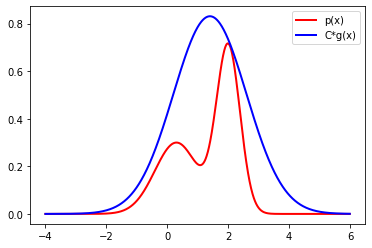

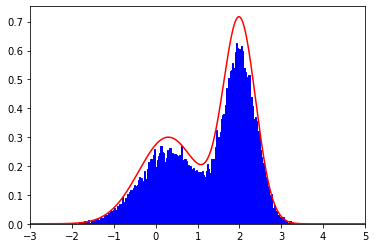

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,uniform 

# 目标采样分布概率密度
def p(x):
    return 0.3*np.exp(-(x-0.3)**2)+0.7*np.exp(-(x-2.)**2/0.3)

# 建议分布G：选择均值为1.4，方差为1.2的正态分布
G_rv = norm(loc=1.4, scale=1.2)

# 常数
C=2.5

# 均匀分布U
unifrom_rv = uniform(loc=0,scale=1)

# 绘制p(x)和G
x = np.arange(-4.,6.,0.01)
plt.plot(x,p(x),color='r',lw=2,label='p(x)')
plt.plot(x,C*G_rv.pdf(x),color='b',lw=2,label='C*g(x)')
plt.legend()
plt.show()

sample = []
for i in range(50000):
    Y = G_rv.rvs(1)[0]
    U = unifrom_rv.rvs(1)[0]
    if p(Y)>=U*C*G_rv.pdf(Y):
        sample.append(Y)

x = np.arange(-3.,5.,0.01)
plt.gca().axes.set_xlim(-3,5)
plt.plot(x,p(x),color = 'r')
plt.hist(sample,color='b',bins=200,density=True,stacked=True,edgecolor='b')
plt.show()